In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Data Loading

In [363]:
df = pd.read_csv("./data/Telco_Customer_Churn.csv")

In [364]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing and Cleaning

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [366]:
# dropping customerid as it is not required for modelling

df = df.drop(columns = ['customerID'])

In [367]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [368]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [369]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [370]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [371]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [372]:
len(df[df["TotalCharges"]==" "])

11

In [373]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [374]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [375]:
print("\nValue Counts for Churn:")
print(df['Churn'].value_counts())


Value Counts for Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column are replaced with 0
4. Class imbalance identified in the target

### Exploratory Data Analysis (EDA)

In [376]:
df.shape

(7043, 20)

In [377]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [378]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features - Analysis**

In [379]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

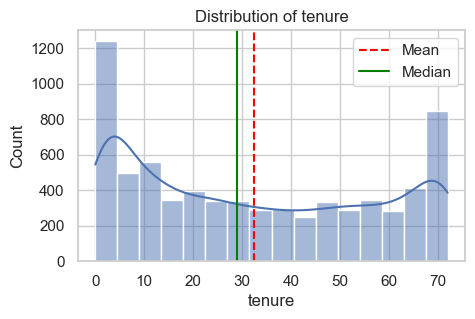

In [380]:
plot_histogram(df, "tenure")

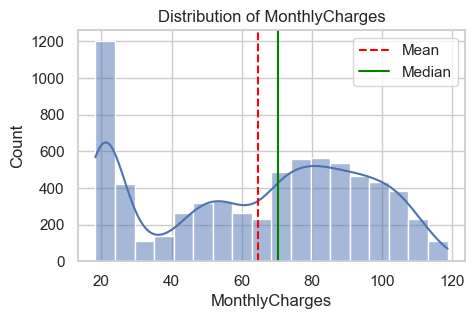

In [381]:
plot_histogram(df, "MonthlyCharges")

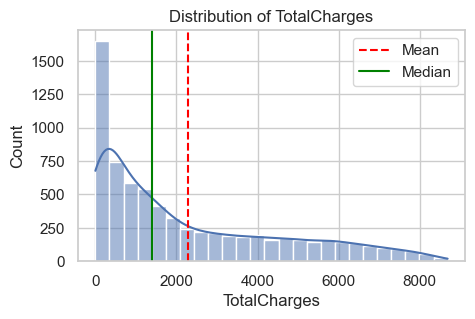

In [382]:
plot_histogram(df, "TotalCharges")

In [383]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

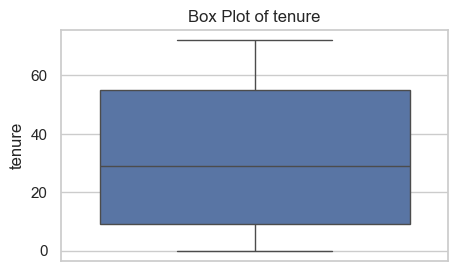

In [384]:
plot_boxplot(df, "tenure")

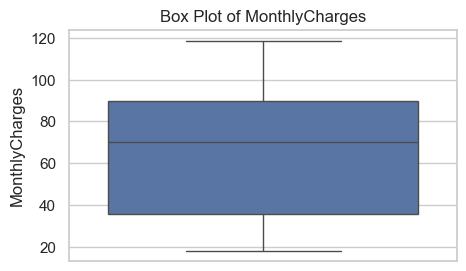

In [385]:
plot_boxplot(df, "MonthlyCharges")

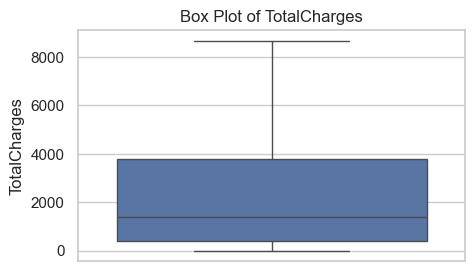

In [386]:
plot_boxplot(df, "TotalCharges")

In [387]:
df['ChurnNumeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

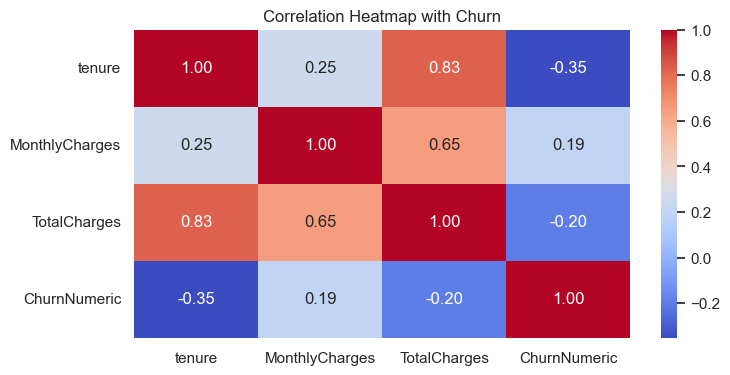

In [388]:
plt.figure(figsize=(8, 4))
sns.heatmap(
    df[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnNumeric']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap with Churn")
plt.show()

# Categorical Feature Analysis of Churn

In [389]:
print(df[['Contract', 'TechSupport', 'PaymentMethod']].isnull().sum())

Contract         0
TechSupport      0
PaymentMethod    0
dtype: int64


In [390]:
print(df['Churn'].unique())

['No' 'Yes']


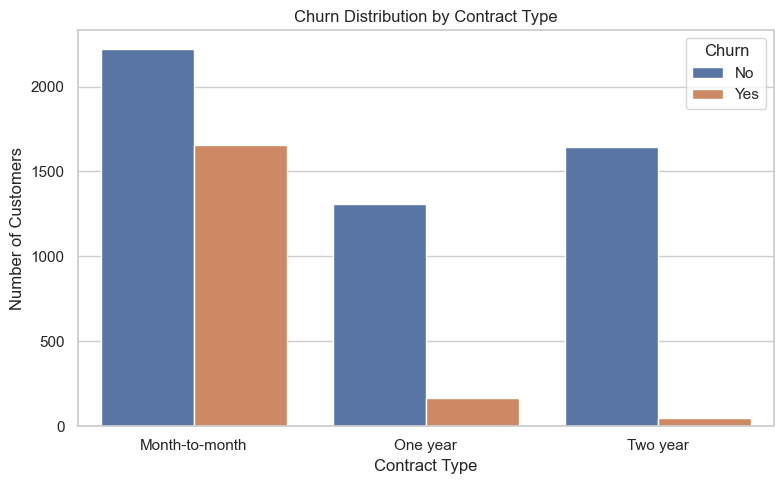

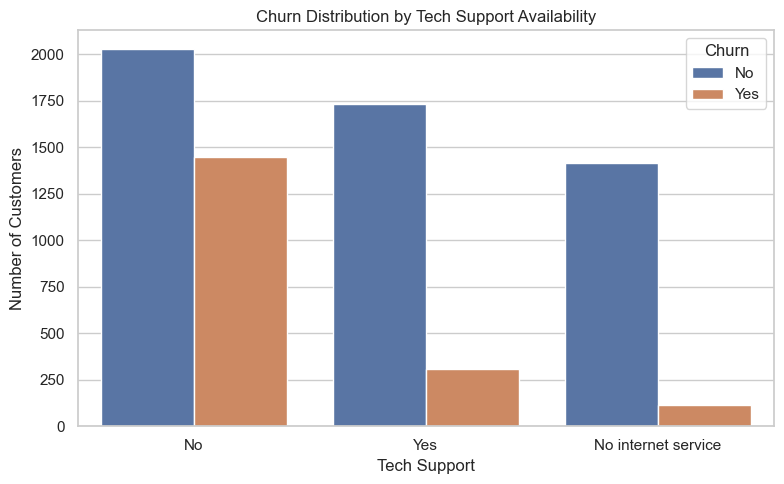

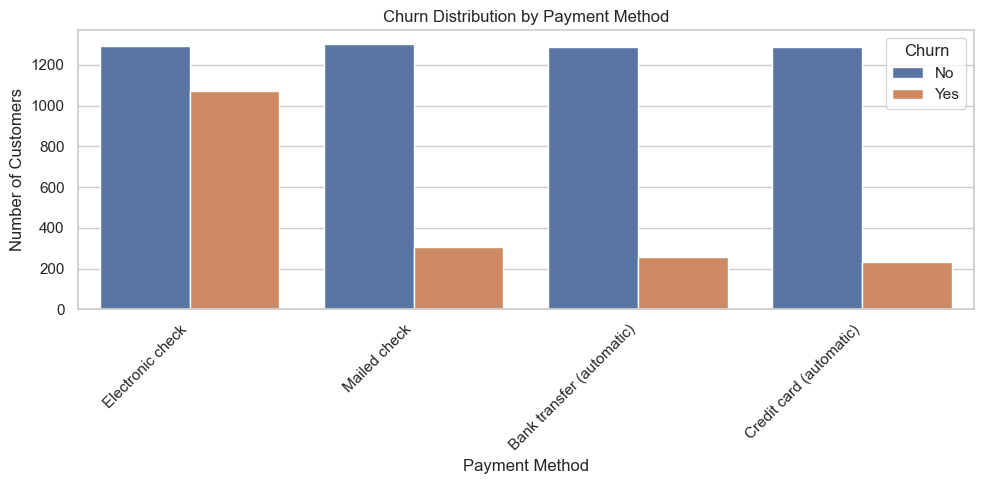

In [391]:
# Set visual style
sns.set(style="whitegrid")

# ============================
# 1. Contract vs Churn
# ============================
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# ============================
# 2. Tech Support vs Churn
# ============================
plt.figure(figsize=(8, 5))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn Distribution by Tech Support Availability')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# ============================
# 3. Payment Method vs Churn
# ============================
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Class Balance Check

Churn
No     5174
Yes    1869
Name: count, dtype: int64


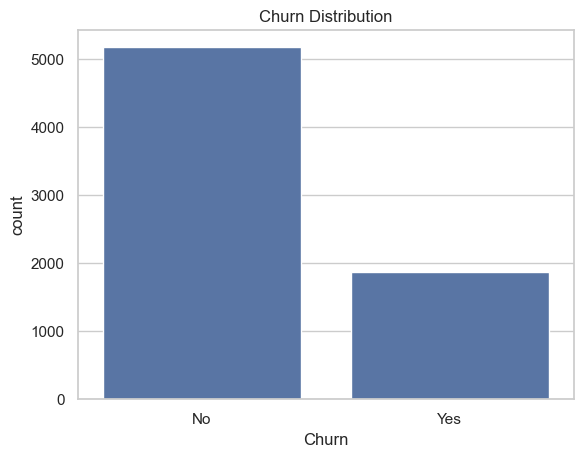

In [392]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

Feature Distributions for Churned vs Non-Churned Customers

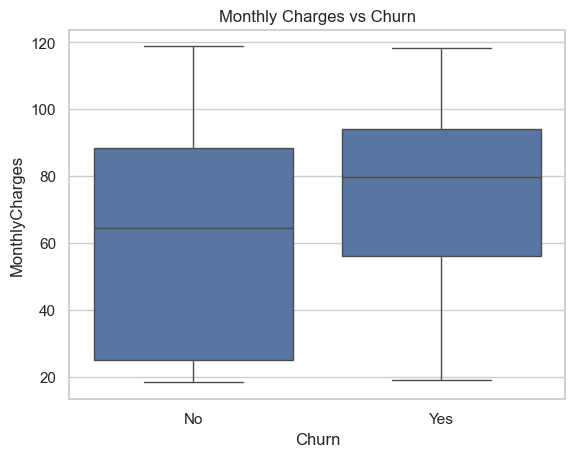

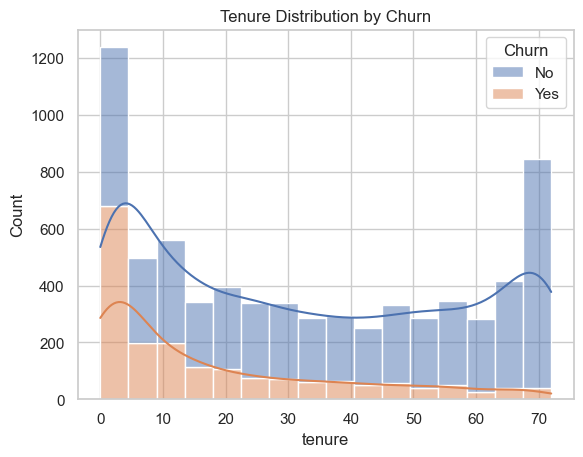

In [393]:
# Compare MonthlyCharges across churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

# Tenure vs Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

Feature Engineering

In [394]:
def create_features(df):
    """
    Creates feature-engineered columns, minimizing data leakage risk.
    """
    df['EngagementScore'] = 0.6 * df['MonthlyCharges'] + 0.4 * df['tenure']  #  Adjust weights as needed

    df['HasTechSupport'] = df['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)

    df['LongTermContract'] = df['Contract'].apply(lambda x: 1 if x in ['One year', 'Two year'] else 0)

    return df

df = create_features(df)

1. Engagement Score

In [395]:
#alpha, beta, gamma = 0.4, 0.3, 0.3 
#df['EngagementScore'] = alpha * df['MonthlyCharges'] + beta * df['tenure'] + gamma * df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
#df.head()

In [396]:
#print(df[['EngagementScore']].isna().sum())

In [397]:
#df['Churn'].unique

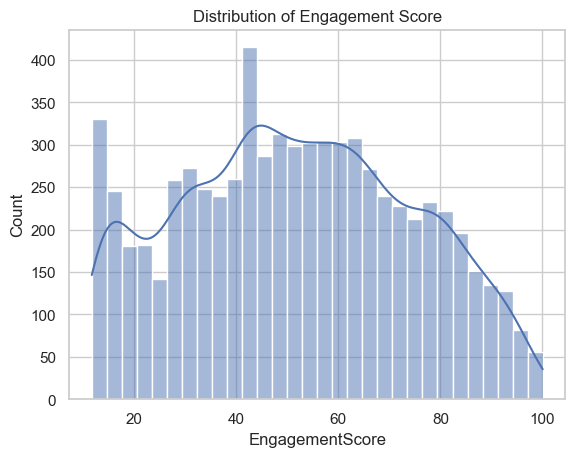

C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3675355576.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes']['EngagementScore'], label='Churn', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\3675355576.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No']['EngagementScore'], label='No Churn', shade=True)


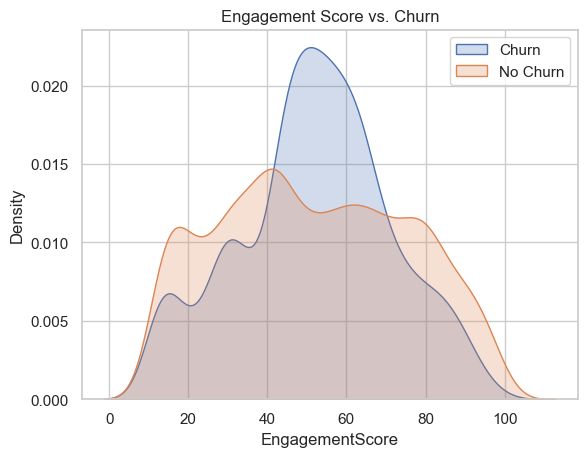

In [398]:
import seaborn as sns
sns.histplot(df['EngagementScore'], bins=30, kde=True)
plt.title("Distribution of Engagement Score")
plt.show()

# KDE Plot of Engagement Score by Churn
sns.kdeplot(df[df['Churn'] == 'Yes']['EngagementScore'], label='Churn', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']['EngagementScore'], label='No Churn', shade=True)
plt.title("Engagement Score vs. Churn")
plt.legend()
plt.show()

2. Customer Interaction Frequency

In [399]:
#df['CustomerInteractionFrequency'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

3. Long term contract

In [400]:
# Convert 'Contract' to binary values (1 for month-to-month, 0 for longer contracts)
#df['LongTermContractStability'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 1})

# View the new column
#df.head()

In [401]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnNumeric,EngagementScore,HasTechSupport,LongTermContract
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,18.31,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,0,47.77,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,33.11,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,43.38,1,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,43.22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,No,0,60.48,1,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,90.72,0,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,22.16,0,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,46.24,0,0


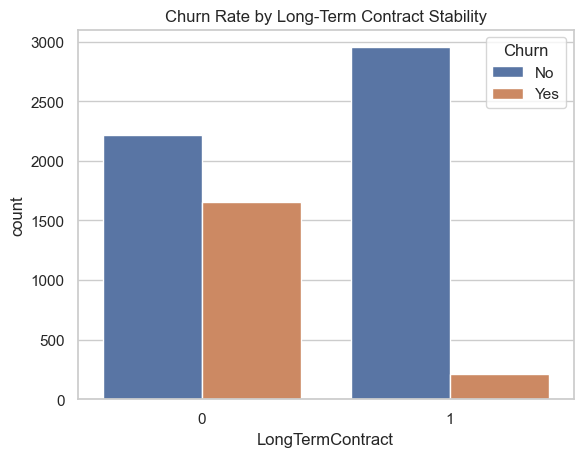

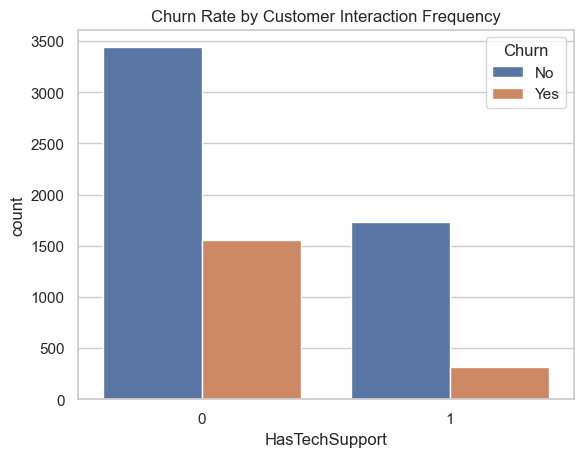

In [402]:
sns.countplot(x='LongTermContract', hue='Churn', data=df)
plt.title("Churn Rate by Long-Term Contract Stability")
plt.show()

# Countplot for Customer Interaction Frequency vs. Churn
sns.countplot(x='HasTechSupport', hue='Churn', data=df)
plt.title("Churn Rate by Customer Interaction Frequency")
plt.show()

In [403]:
#df['Churn'].unique()

In [404]:
#df

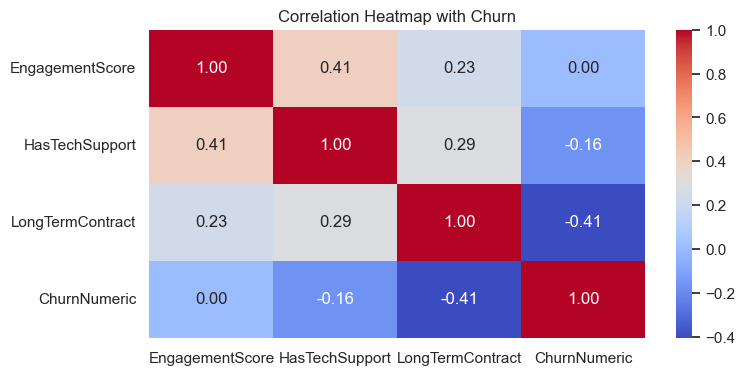

In [405]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Compute correlation with new features
plt.figure(figsize=(8, 4))
sns.heatmap(
    df[["EngagementScore", "HasTechSupport", 
        "LongTermContract", "ChurnNumeric"]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap with Churn")
plt.show()

In [406]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label encoding of categorical fetaures

In [407]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [408]:
categorical_cols = df.select_dtypes(include='object').columns
encoders = {}  #  Store encoders for later use

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

#  Save the encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

**Training and test data split and Scaling**

In [409]:
from sklearn.preprocessing import StandardScaler

In [410]:
X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)  #  Ensure y is integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  #  stratify

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [411]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Oversampling the imbalanced data

In [412]:
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss

In [413]:

#scaler = StandardScaler()
#X_train= scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [414]:
#X_train

In [415]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [416]:
smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class Distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

Class Distribution after SMOTE:
 Churn
0    4139
1    4139
Name: count, dtype: int64


In [417]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [418]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [419]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 1.00
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 1.00
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 1.00
----------------------------------------------------------------------


In [422]:
def evaluate_model(model, X, y, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    accuracies = []
    reports = []
    all_encoders = []  #  Store encoders for inspection
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        X_train = create_features(X_train)
        X_val = create_features(X_val)

        #  LABEL ENCODING (INSIDE CV!)
        categorical_cols_train = X_train.select_dtypes(include='object').columns
        encoders = {}
        for col in categorical_cols_train:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_val[col] = le.transform(X_val[col])
            encoders[col] = le
        all_encoders.append(encoders)  #  Store for inspection

        #  SCALING (INSIDE CV!)
        numerical_cols_train = X_train.select_dtypes(include=np.number).columns
        scaler = StandardScaler()
        X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])
        X_val[numerical_cols_train] = scaler.transform(X_val[numerical_cols_train])

        #  MODEL TRAINING
        pipeline = Pipeline([('smote', SMOTE(random_state=42)), ('clf', model)])
        pipeline.fit(X_train, y_train)

        #  EVALUATION
        y_pred = pipeline.predict(X_val)
        accuracies.append(accuracy_score(y_val, y_pred))
        reports.append(classification_report(y_val, y_pred, output_dict=True))
    return accuracies, reports, all_encoders  #  Return encoders

#  Run with encoder tracking
model_accuracies, model_reports, all_encoders = evaluate_model(RandomForestClassifier(random_state=42), X, y)
print("CV Accuracies:", model_accuracies)
print("Mean CV Accuracy:", np.mean(model_accuracies))

#  Inspect the encoders (example - first fold, first categorical column)
first_fold_encoders = all_encoders[0]
first_col = list(first_fold_encoders.keys())[0]
print(f"\nEncoder for first column ({first_col}) in first fold:")
print(first_fold_encoders[first_col].classes_)
print(first_fold_encoders[first_col].transform(first_fold_encoders[first_col].classes_))

CV Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean CV Accuracy: 1.0


IndexError: list index out of range

In [423]:
df_with_target = pd.concat([X, y], axis=1)
print("Number of identical rows (including target):", df_with_target.duplicated().sum())

Number of identical rows (including target): 22
